In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, utils
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape)
print(test_images.shape)

Mounted at /content/drive
(60000, 28, 28, 1)
(10000, 28, 28, 1)


9


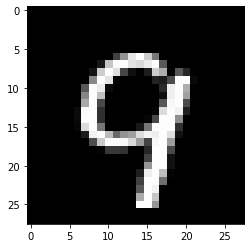

In [5]:
n = 16
test_images_n = test_images[n]
flog = open("data.log", "w")
plt.imshow(test_images_n.reshape(28,28), cmap='gray')
print(test_labels[n])
for i in range(28):
    for j in range(28):
        print("%d "%abs((test_images_n[i][j][0]*255).astype(int)), file = flog, end=' ')
        print("", file = flog) 
print("", file = flog) 
for i in range(28):
    for j in range(28):
        print("%d "%abs((test_images_n[i][j][0]*255).astype(int)), file = flog, end=' ') 
    print("", file = flog)  
print("", file = flog)     
print(test_labels[n], file = flog)
test_images_n = test_images_n.reshape(1,28,28,1)
flog.close()

In [6]:
mnist = models.load_model('/content/drive/MyDrive/공부/아이덱/mnist/mnist.h5')
mnist.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_7 (Dense)              (None, 16)               

In [8]:
predicted_result_2 = mnist.predict(test_images_n)
predicted_labels_2 = np.argmax(predicted_result_2, axis=1)
print(predicted_result_2)
print(predicted_labels_2)

[[9.0338239e-18 3.2024326e-21 3.1048672e-26 6.3097479e-20 8.7204806e-11
  1.3072448e-22 8.9675607e-25 3.4679532e-15 1.6337065e-17 1.0000000e+00]]
[9]


In [10]:
test_loss, test_acc = mnist.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.0755 - accuracy: 0.9889
0.9889000058174133


In [16]:
#16bit
np.set_printoptions(threshold = 1e6)
CNN_W = mnist.get_weights()

flog = open("conv1.log", 'w')
    
for i in range(5):
    for j in range(5):
        for o in range(6):
            if (CNN_W[0][i][j][0][o]*32786).astype(int) < 0 :
                print("-", file = flog, end='')
            print("16'd%d, "%abs((CNN_W[0][i][j][0][o]*32786).astype(int)) , file = flog, end=' ')
        print("", file = flog)
    print("", file = flog)
        
print("==========================conv1_bias==========================", file = flog)       
print("", file = flog)   
for o in range(6):
    if (CNN_W[1][o]*8388608).astype(int) < 0 :
        print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[1][o]*8388608).astype(int)), file = flog, end=' ')
        
flog.close()
    
####################################################    

flog = open("conv2.log", 'w') 
    
for row in range(5):
    for col in range(5):
        for o in range(16):
            for i in range(6):
                if (CNN_W[2][row][col][i][o]*32786).astype(int) < 0 :
                   print("-", file = flog, end='')
                print("16'd%d, "%abs((CNN_W[2][row][col][i][o]*32786).astype(int)) , file = flog, end=' ')
            print("", file = flog)
        print("", file = flog)
    print("", file = flog)
    
print("", file = flog)  
    
print("", file = flog)
print("", file = flog)   
print("==========================conv2_bias==========================", file = flog) 
for o in range(16):
    if (CNN_W[3][o]*8388608).astype(int) < 0 :
         print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[3][o]*8388608).astype(int)), file = flog, end=' ')
        
flog.close()

####################################################    

flog = open("fc1.log", 'w')
    
for o in range(32):
    for i in range(256):
        if (CNN_W[4][i][o]*32786).astype(int) < 0 :
            print("-", file = flog, end='')
        print("16'd%d, "%abs((CNN_W[4][i][o]*32786).astype(int)) , file = flog, end=' ')
        if i%16==15 :
            print("", file = flog) 
    print("", file = flog)
print("==========================bias_fc1==========================", file = flog)   
for o in range(32):
    if (CNN_W[5][o]*8388608).astype(int) < 0 :
        print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[5][o]*8388608).astype(int)) , file = flog, end=' ')
    if o%16==15 :
        print("", file = flog)  
print("", file = flog) 

flog.close()

#################################################### 

flog = open("fc2.log", 'w')
    
for o in range(16):
    for i in range(32):
        if (CNN_W[6][i][o]*32786).astype(int) < 0 :
            print("-", file = flog, end='')
        print("16'd%d, "%abs((CNN_W[6][i][o]*32786).astype(int)) , file = flog, end=' ')
        if i%16==15 :
            print("", file = flog) 
    print("", file = flog) 
print("==========================bias_fc2==========================", file = flog)  
for o in range(16):
    if (CNN_W[7][o]*8388608).astype(int) < 0 :
        print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[7][o]*8388608).astype(int)) , file = flog, end=' ')
    if o%16==15 :
        print("", file = flog)  
print("", file = flog)

flog.close()
#################################################### 

flog = open("fc3.log", 'w')

for o in range(10):
    for i in range(16):
        if (CNN_W[8][i][o]*32786).astype(int) < 0 :
            print("-", file = flog, end='')
        print("16'd%d, "%abs((CNN_W[8][i][o]*32786).astype(int)) , file = flog, end=' ')
        if i%16==15 :
            print("", file = flog) 
    print("", file = flog)
print("==========================bias_fc3==========================", file = flog) 
for o in range(10):
    if (CNN_W[9][o]*8388608).astype(int) < 0 :
        print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[9][o]*8388608).astype(int)) , file = flog, end=' ')
    if o%16==15 :
        print("", file = flog)  
print("", file = flog)

flog.close()

In [ ]:
#output

conv1 = models.Sequential()
conv1.add(layers.InputLayer(input_shape=(28, 28, 1)))
conv1.add(mnist.layers[0])
conv1.add(mnist.layers[1])
conv1.summary()
conv1_pred = conv1.predict(test_images_n)


flog = open("conv1_Output.log", "w")

for o in range(6):
    for i in range(12):
        for j in range(12):
            print("%d, "%abs((conv1_pred[0][i][j][o]*256).astype(int)) , file = flog, end=' ')
        print("", file = flog)
    print("", file = flog)

flog.close()

####################################################

conv2 = models.Sequential()
conv2.add(layers.InputLayer(input_shape=(28, 28, 1)))
conv2.add(mnist.layers[0])
conv2.add(mnist.layers[1])
conv2.add(mnist.layers[2])
conv2.add(mnist.layers[3])
conv2.summary()
conv2_pred = conv2.predict(test_images)

flog = open("conv2_Output.log", "w")

#print(conv2_pred, file=flog)

for o in range(16):
    for i in range(4):
        for j in range(4):
            print("%.4f,  "%abs((conv2_pred[0][i][j][o]).astype(int)), file = flog, end=' ')
        print("", file = flog)
    print("", file = flog)

flog.close()

####################################################

fc1 = models.Sequential()
fc1.add(layers.InputLayer(input_shape=(28, 28, 1)))
fc1.add(mnist.layers[0])
fc1.add(mnist.layers[1])
fc1.add(mnist.layers[2])
fc1.add(mnist.layers[3])
fc1.add(mnist.layers[4])
fc1.add(mnist.layers[5])
fc1.summary()
fc1_pred = fc1.predict(test_images)

flog = open("fc1_Output.log", "w")

#print(fc1_pred, file=flog)

for o in range(64):
      print("%d,  "%abs((fc1_pred[0][o]*256).astype(int)), file = flog, end=' ')

flog.close()

####################################################

fc2 = models.Sequential()
fc2.add(layers.InputLayer(input_shape=(28, 28, 1)))
fc2.add(mnist.layers[0])
fc2.add(mnist.layers[1])
fc2.add(mnist.layers[2])
fc2.add(mnist.layers[3])
fc2.add(mnist.layers[4])
fc2.add(mnist.layers[5])
fc2.summary()
fc2_pred = fc2.predict(test_images)

flog = open("fc2_Output.log", "w")

#print(fc1_pred, file=flog)

for o in range(32):
      print("%d,  "%abs((fc2_pred[0][o]*256).astype(int)), file = flog, end=' ')

flog.close()

####################################################

mnist_pred = mnist.predict(test_images_n)

flog = open("FC3_Output.log", "w")

print(mnist_pred, file=flog)
 
print("", file = flog)
for i in range(25):
    if (mnist_pred[0][i]*512).astype(int) < 0 :
      print("-", file = flog, end='')
    print("%d, "%abs((mnist_pred[0][i]*256).astype(int)), file = flog, end=' ')
    if i%16==15 :
        print("", file = flog) 
print("", file = flog)    
    
flog.close()